## Instructions Before Making Your Hands Dirty
Recommended to go through the dataset description here: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset. We have used the dataset named 'covid_19_data.csv' file.

**Note:** To solve these questions please load the data from here: https://raw.githubusercontent.com/dphi-official/Datasets/master/covid_19_data.csv because the data at kaggle is updated everyday using which might lead to get you wrong answers for this particular assignment.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/covid_19_data.csv")

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40805 entries, 0 to 40804
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              40805 non-null  int64  
 1   ObservationDate  40805 non-null  object 
 2   Province/State   22790 non-null  object 
 3   Country/Region   40805 non-null  object 
 4   Last Update      40805 non-null  object 
 5   Confirmed        40805 non-null  float64
 6   Deaths           40805 non-null  float64
 7   Recovered        40805 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.5+ MB


In [116]:
data.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     18015
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [117]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Information about the dataset:

There are 8 features:

* SNo: Serial number
* ObservationDate: Date of observation of the cases (format: MM/DD/YYYY)
* Province/State: Province or State of the country where cases were observed
* Country/Region: Country where cases were observed
* Last Update: Time in UTC at which the row is updated for the given province or country. (It is not in a standard format)
* Confirmed: Cumulative number of confirmed cases till the date
* Deaths: Cumulative number of deaths till the date
* Recovered: Cumulative number of recovered cases till date

**Instruction for the learner:** 
* Recommended to revise 'groupby()' method of pandas
* Recommended to understand the word **'Cummulative'** properly for three features - 'Confirmed', 'Recovered' and 'Deaths'.
* Please note that the dtype of datetime columns are of object, convert them to datetime as shown below:

In [118]:
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])
data['Last Update'] = pd.to_datetime(data['Last Update'])

In [120]:
data.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [121]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


**Question 1**

Which of the following is correct month of median observation date?

1. January
2. March
3. April
4. May

**Question 2**

Create a subset of your data, only taking observations which was **last updated** on **2020-06-13 03:33:14** and name this dataframe as updated_data. Select the correct statement about this dataframe i.e. **updated_data**?

**1. There are 729 observations / records**

**2. There are 190 unique country's records available in the dataframe**

3. There are 223 unique country's records available in the dataframe.

4. This dataset doesn't have any missing values.


In [170]:
updated_data = data[data['Last Update'] == '2020-06-13 03:33:14']
countries = updated_data['Country/Region'].value_counts().to_frame()
print (countries.index)

updated_data

Index(['Russia', 'US', 'Japan', 'India', 'Colombia', 'Mexico',
       'Mainland China', 'Brazil', 'Ukraine', 'Peru',
       ...
       'Romania', 'Madagascar', 'Afghanistan', 'Taiwan', 'Costa Rica', 'Gabon',
       'Sierra Leone', 'Tajikistan', 'Austria', 'Lesotho'],
      dtype='object', length=190)


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
40076,40077,2020-06-12,NaN,Afghanistan,2020-06-13 03:33:14,23546.0,446.0,3928.0
40077,40078,2020-06-12,NaN,Albania,2020-06-13 03:33:14,1416.0,36.0,1034.0
40078,40079,2020-06-12,NaN,Algeria,2020-06-13 03:33:14,10698.0,751.0,7322.0
40079,40080,2020-06-12,NaN,Andorra,2020-06-13 03:33:14,853.0,51.0,781.0
40080,40081,2020-06-12,NaN,Angola,2020-06-13 03:33:14,130.0,5.0,42.0
...,...,...,...,...,...,...,...,...
40800,40801,2020-06-12,Zacatecas,Mexico,2020-06-13 03:33:14,501.0,55.0,279.0
40801,40802,2020-06-12,Zakarpattia Oblast,Ukraine,2020-06-13 03:33:14,1506.0,38.0,675.0
40802,40803,2020-06-12,Zaporizhia Oblast,Ukraine,2020-06-13 03:33:14,515.0,15.0,322.0
40803,40804,2020-06-12,Zhejiang,Mainland China,2020-06-13 03:33:14,1268.0,1.0,1267.0


In [124]:
updated_data.isnull().sum()

SNo                  0
ObservationDate      0
Province/State     169
Country/Region       0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

**Question 3**

Create a subset of data from the dataframe **updated_data**, only taking the top 10 countries which have the maximum number of confirmed cases with features - **'Country/Region', 'Confirmed', 'Deaths' and 'Recovered'**. Name this dataframe as 'top_10'. Which of the following countries are not present in the dataframe 'top_10'.

1. Germany

**2. Iran**

3. India

4. Spain

5. Peru

**6. Chile** 

**7. Mexico**

**8. Pakistan**

9. USA

10. UK

**['US', 'Brazil', 'Russia', 'India', 'UK', 'Spain', 'Italy', 'Peru','France', 'Germany']**

In [175]:
top_10 = updated_data[['Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
top_10 = top_10.groupby(['Country/Region'])['Confirmed', 'Deaths', 'Recovered'].sum()
top_10 = top_10.nlargest(10, ['Confirmed'])
top_10

C:\Users\sumai\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Confirmed,Deaths,Recovered
Country/Region,,,
US,2048986.0,114669.0,547386.0
Brazil,828810.0,41828.0,445123.0
Russia,510761.0,6705.0,268862.0
India,297535.0,8498.0,147195.0
UK,294402.0,41566.0,1282.0
Spain,243209.0,27136.0,150376.0
Italy,236305.0,34223.0,173085.0
Peru,214788.0,6088.0,107133.0
France,193220.0,29377.0,72695.0


**Question 4**

Which country has the lowest number of confirmed cases among the ten countries in top_10 dataframe?

**1. Germany**

2. France

3. India

4. UK



**Question 5**

Add two columns in top_10 dataframe - 'Recovered_percentage' and 'Deaths_percentage' where, 

'Recovered_percentage' = (Recovered cases / Confirmed cases) * 100

'Death_percentage' = (Deaths cases / Confirmed cases) * 100

Among these 10 countries which country has the highest recovery percent?

1. India

2. Italy

3. Spain

**4. Germany**



In [176]:
top_10['Recovered_percentage'] = (top_10.Recovered*100.0)/top_10.Confirmed
top_10['Death_percentage'] = (top_10.Deaths*100.0)/top_10.Confirmed
top_10 = top_10.nlargest(1, ['Recovered_percentage'])
top_10

,Confirmed,Deaths,Recovered,Recovered_percentage,Death_percentage
Country/Region,,,,,
Germany,187226.0,8783.0,171535.0,91.61922,4.691122


**Question 6**

Among the ten countries in top_10 dataframe, which country has the lowest death percentage?

1. India

2. UK

3. USA

**4. Germany**

5. Russia


In [177]:
top_10 = top_10.nsmallest(1, ['Death_percentage'])
top_10

,Confirmed,Deaths,Recovered,Recovered_percentage,Death_percentage
Country/Region,,,,,
Germany,187226.0,8783.0,171535.0,91.61922,4.691122


**Question 7**

Create a subset of data from the initially loaded data i.e. the datafram **'data'**, which should include the day wise observations of country 'Germany' only with features - **'ObservationDate', 'Confirmed', 'Recovered', 'Deaths'**. Name this dataframe as 'Germany_data'. From the dataset 'Germany_data', what does it look like?
[Note: Here you need graphs to visualize]

**1. The rate of confirmed cases and the rate of recovered cases are going parallel to each other.**

2. The rate of recovered cases is more than the rate of confirmed cases.



In [180]:
Germany_data = data[data['Country/Region'] ==  'Germany']
Germany_data = Germany_data[['ObservationDate', 'Confirmed', 'Recovered', 'Deaths']]
Germany_data = Germany_data.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered'].sum()
Germany_data

C:\Users\sumai\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-28,4.0,0.0,0.0
2020-01-29,4.0,0.0,0.0
2020-01-30,4.0,0.0,0.0
2020-01-31,5.0,0.0,0.0
2020-02-01,8.0,0.0,0.0
...,...,...,...
2020-06-08,186109.0,8695.0,169556.0
2020-06-09,186506.0,8736.0,170129.0
2020-06-10,186522.0,8752.0,170630.0


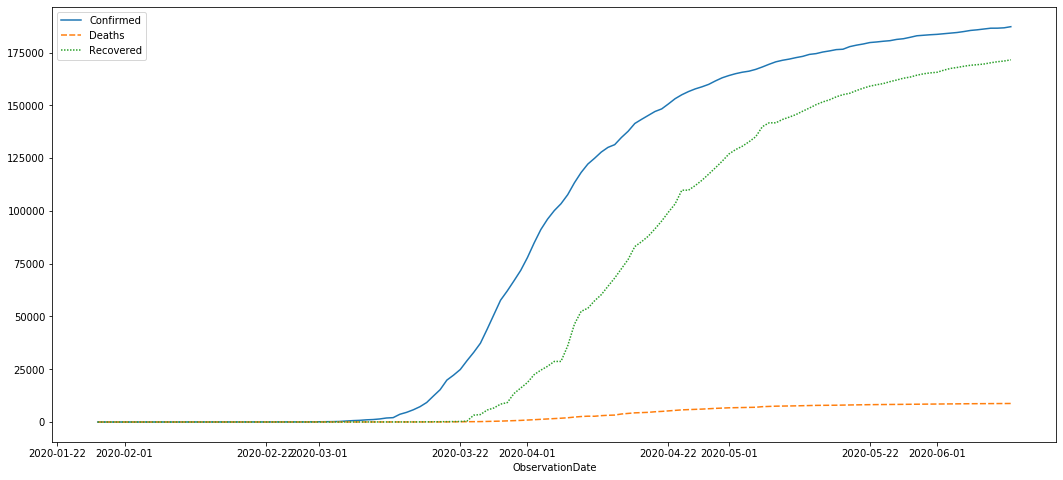

In [181]:
ax = sns.lineplot(data = Germany_data)
ax.figure.set_size_inches(18, 8)

**Question 8**

Take the help of the dataframe 'updated_data' to get the total confirmed, recovered and deaths cases worldwide. Choose the correct option

**1. Confirmed cases worldwide is 7632802.**

**2. Recovered cases worldwide is 3613277.**

**3. Total number of deaths worldwide is 425394.**

In [182]:
updated_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
40076,40077,2020-06-12,NaN,Afghanistan,2020-06-13 03:33:14,23546.0,446.0,3928.0
40077,40078,2020-06-12,NaN,Albania,2020-06-13 03:33:14,1416.0,36.0,1034.0
40078,40079,2020-06-12,NaN,Algeria,2020-06-13 03:33:14,10698.0,751.0,7322.0
40079,40080,2020-06-12,NaN,Andorra,2020-06-13 03:33:14,853.0,51.0,781.0
40080,40081,2020-06-12,NaN,Angola,2020-06-13 03:33:14,130.0,5.0,42.0


In [183]:
print("Confirmed: ", updated_data.Confirmed.sum())
print("Recovered: ", updated_data.Recovered.sum())
print("Deaths: ", updated_data.Deaths.sum())

Confirmed:  7632802.0
Recovered:  3613277.0
Deaths:  425394.0


**Question 9**

Get the data of USA from the dataframe 'updated_data', group the data state/province wise. Which of the following information is correct about Province/State of USA?

**1. New York has the highest number of confirmed cases.**

**2. Massachusetts has the 5th highest number of confirmed cases.**

In [184]:
USA = updated_data[updated_data['Country/Region'] == 'US']
USA = USA.groupby(['Province/State'])['Confirmed', 'Deaths', 'Recovered'].sum()
USA = USA.nlargest(50, ['Confirmed'])
USA

C:\Users\sumai\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Confirmed,Deaths,Recovered
Province/State,,,
New York,381714.0,30758.0,0.0
New Jersey,166164.0,12489.0,0.0
California,146659.0,4978.0,0.0
Illinois,131198.0,6260.0,0.0
Massachusetts,105059.0,7538.0,0.0
Texas,84927.0,1956.0,0.0
Pennsylvania,82481.0,6162.0,0.0
Florida,70971.0,2877.0,0.0
Michigan,65672.0,5990.0,0.0
